# Домашнее задание №2. Многослойная нейронная сеть

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import torch

In [67]:
import numpy as np

## MLP

## Данные

In [68]:
import torchvision as tv

In [69]:
import time

In [70]:
BATCH_SIZE=256

In [ ]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

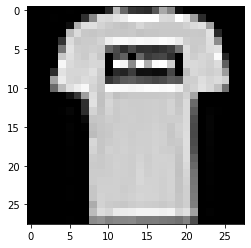

In [73]:
plt.imshow(train_dataset[1][0].numpy().reshape(28,28), cmap='gray')

### Модель

In [86]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.40),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.20),
    torch.nn.Linear(128, 64),
    torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)


### Обучение

In [89]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 25

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 13.182, train_loss: 0.6516992755392764, train_acc: 0.80125, test_loss: 0.422234445437789, test_acc: 0.8483
ep: 1, taked: 13.041, train_loss: 0.40997766801651486, train_acc: 0.8539333333333333, test_loss: 0.3774901408702135, test_acc: 0.8627
ep: 2, taked: 13.440, train_loss: 0.37021709211329196, train_acc: 0.8651833333333333, test_loss: 0.3674638202413917, test_acc: 0.8622
ep: 3, taked: 13.057, train_loss: 0.3465594886465276, train_acc: 0.8732833333333333, test_loss: 0.3423274112865329, test_acc: 0.8731
ep: 4, taked: 12.941, train_loss: 0.3292641892078075, train_acc: 0.8801, test_loss: 0.3448354180902243, test_acc: 0.8728
ep: 5, taked: 13.077, train_loss: 0.31250698414254696, train_acc: 0.88535, test_loss: 0.34049927834421395, test_acc: 0.8737
ep: 6, taked: 13.231, train_loss: 0.3036148314146285, train_acc: 0.8887833333333334, test_loss: 0.32885413579642775, test_acc: 0.8789
ep: 7, taked: 13.367, train_loss: 0.29243683390160824, train_acc: 0.8936666666666667, test_loss: 0.

**Вывод:** обученная модель достигает точности в 88% за 11 эпох. Далее качество также продолжает расти.